<a href="https://colab.research.google.com/github/OswaldVc/AnaDat/blob/main/Temperatura_Analisis_series_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


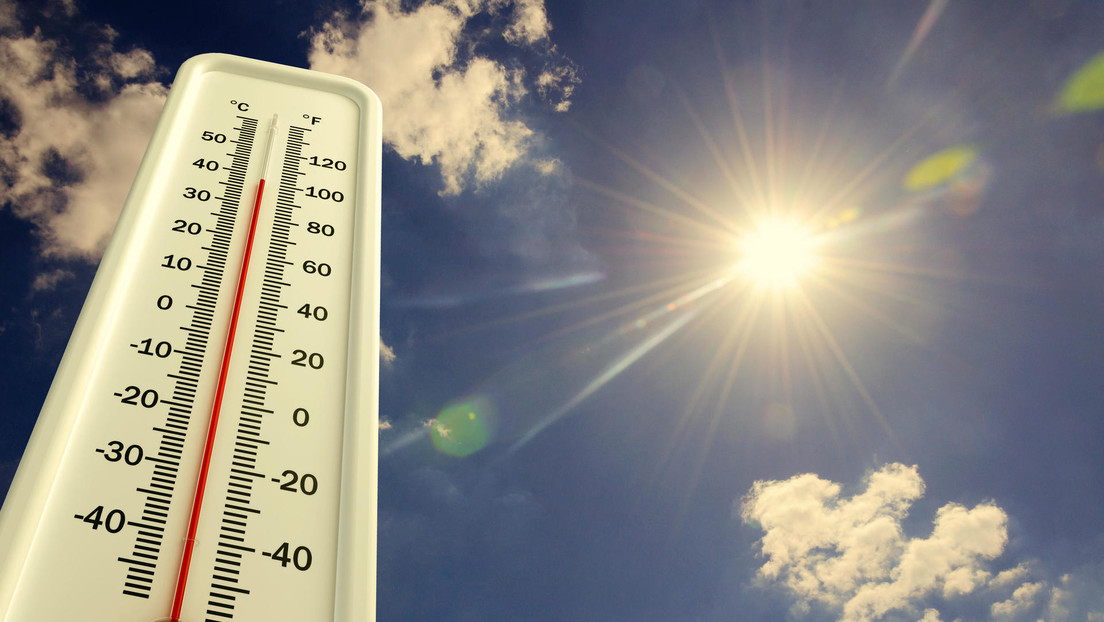



 > **Néstor O. Vásquez C.**

**ANÁLISIS DE DATOS**

>>> Sección de librerias necesarias en el proyectos:

In [32]:
from flask import *
import numpy as np # linear algebra
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt

# ------- Importación de Módulos ------------

from locale import normalize
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import missingno as msno
## Data cleaning y data wrangling
import pandas            as pd
import numpy             as np
## Visualización
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.express    as px
import warnings
from scipy.stats import t, nct   ## distribuciones t y t no-central.


from sklearn.linear_model import LinearRegression ## Modelo lineal.
## Parte estadística.
import statsmodels.formula.api  as smf           ## Modelos lineal.
from scipy.stats import shapiro, probplot        ## libreria estadística de Scipy
from statsmodels.stats.anova import anova_lm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.linear_model import LinearRegression ## Modelo lineal.

## Parte estadística.
import statsmodels.formula.api  as smf          ## Modelos lineal.
from scipy.stats import shapiro, probplot       ## libreria estadística de Scipy
from statsmodels.stats.anova import anova_lm    ## Anova del modelo lineal

import requests
from bs4 import BeautifulSoup
import os
from google.colab import drive
from bs4 import BeautifulSoup

sns.set_style("darkgrid") ## Estilo para los gráficos
warnings.filterwarnings("ignore")
plt.style.use("ggplot")


**WEB SCRAPING**

>>> Cargar datos désde URL a Drive:

In [ ]:
from google.colab import drive
import os
import requests
from bs4 import BeautifulSoup

# Montar Google Drive en Colab
drive.mount('/content/drive')

def extraer_enlaces_zip(url):
    respuesta = requests.get(url)
    soup = BeautifulSoup(respuesta.text, 'html.parser')
    enlaces = soup.find_all('a')
    # Asegúrate de que la URL base no termine con "/", o ajusta según sea necesario
    url_base = url.rstrip('/')
    enlaces_zip = [url_base + enlace.get('href') for enlace in enlaces if enlace.get('href') and enlace.get('href').endswith('.zip')]
    return enlaces_zip

url = 'https://www.bgc-jena.mpg.de/wetter/weather_data.html' # URL del repositorio original
enlaces_zip = extraer_enlaces_zip(url)
print(enlaces_zip)

def descargar_y_guardar_archivos(enlaces_zip, carpeta_destino):
    # Asegurarse de que la carpeta de destino existe
    os.makedirs(carpeta_destino, exist_ok=True)

    for enlace in enlaces_zip:
        # Obtener el nombre del archivo del enlace
        nombre_archivo = enlace.split('/')[-1]
        ruta_completa = os.path.join(carpeta_destino, nombre_archivo)  # Corregido para usar correctamente os.path.join

        # Descargar el archivo
        respuesta = requests.get(enlace)
        # Guardar el archivo en el disco
        with open(ruta_completa, 'wb') as archivo:
            archivo.write(respuesta.content)
        print(f'Archivo {nombre_archivo} descargado y guardado en {ruta_completa}.')

# Asegúrate de corregir la ruta de carpeta_destino a una válida en tu entorno
carpeta_destino = '/content/drive/MyDrive/BBDD'

# Llamada a la función para descargar los archivos
descargar_y_guardar_archivos(enlaces_zip, carpeta_destino)

>> Funciones para extraer el contenido de los .zip en el mismo directorio donde se descargaron.

In [ ]:
import pandas as pd
import os
import zipfile
import chardet

# Ruta de la carpeta donde se encuentran los archivos ZIP descargados
directorio_zip = '/content/drive/MyDrive/BBDD'

# Lista para almacenar los DataFrames de los archivos CSV
dfs = []

# Recorrer todos los archivos ZIP en la carpeta
for archivo_zip in os.listdir(directorio_zip):
    if archivo_zip.endswith('.zip'):
        # Ruta completa del archivo ZIP
        ruta_archivo_zip = os.path.join(directorio_zip, archivo_zip)

        # Extraer el contenido del archivo ZIP
        with zipfile.ZipFile(ruta_archivo_zip, 'r') as zip_ref:
            zip_ref.extractall(directorio_zip)

        # Recorrer todos los archivos extraídos
        for archivo_csv in os.listdir(directorio_zip):
            if archivo_csv.endswith('.csv'):
                # Ruta completa del archivo CSV
                ruta_archivo = os.path.join(directorio_zip, archivo_csv)

                # Detectar el encoding del archivo
                with open(ruta_archivo, 'rb') as f:
                    result = chardet.detect(f.read())

                # Leer el archivo y cargarlo en un DataFrame
                df = pd.read_csv(ruta_archivo, encoding=result['encoding'], error_bad_lines=False)

                # Agregar el DataFrame a la lista
                dfs.append(df)

# Concatenar todos los DataFrames en uno solo
df_final = pd.concat(dfs, ignore_index=True)

# Guardar el DataFrame final en un archivo CSV
df_final.to_csv('/content/drive/MyDrive/BBDD/datos_completos.csv', index=False)


df_final.head(10)